In [1]:
import pandas as pd
import lxml.html
import requests

In [2]:
# covid-19 사이트
res = requests.get('https://www.who.int/emergencies/diseases/novel-coronavirus-2019/events-as-they-happen')

In [3]:
root = lxml.html.fromstring(res.text)

In [4]:
# root 엘리멘탈 확인
root

<Element html at 0x208a74c61d8>

In [113]:
content = root.cssselect('div#PageContent_C003_Col01')[0].text_content() # div id

In [97]:
content = root.cssselect('.sf_colsIn.col-md-10')[0].text_content() #class로 불러오기

In [114]:
root.cssselect('div#PageContent_C003_Col01') #div id  testing

[<Element div at 0x208a9d328b8>]

In [98]:
root.cssselect('.sf_colsIn.col-md-10') #div class testing

[<Element div at 0x208a9d328b8>]

In [115]:
content

'\r\n    \r\n    \r\n    \r\n    \r\n    \r\n\r\n\r\n\r\n    \r\n    \r\n\r\n\r\n\r\n    \r\n\r\n\r\n    \r\n\r\n\r\n\r\n    \r\n        \r\n                Summary\r\n\r\n            \r\n                \r\n                \r\n            \r\n\r\n                \r\n                    • A pneumonia of unknown cause detected in Wuhan, China was first reported to the WHO Country Office in China on 31 December 2019. \n• WHO is working 24/7 to analyse data, provide advice, coordinate with partners, help countries prepare, increase supplies and manage expert networks.\n• The outbreak was declared a Public Health Emergency of International Concern on 30 January 2020. \n\n• The international community has asked for US$675 million to help protect states with weaker health systems as part of its Strategic Preparedness and Response Plan. \n• On 11 February 2020, WHO announced a name for the new coronavirus disease: COVID-19.\n• To stay up to date, follow @DrTedros and @WHO on Twitter, read WHO

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
# english 접두사 Ex) And/to/the/etc.. 제거

In [117]:
tdm = cv.fit_transform([content]).toarray()
tdm

array([[19,  1,  1, ...,  1,  1,  1]], dtype=int64)

In [118]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

In [121]:
df

,word,freq
0,000,19
1,000situation,1
2,02skex6uw8,1
3,0kghralipq,1
4,0mwl15ofkt,1
...,...,...
2418,𝙩𝙤,1
2419,𝙫𝙞𝙧𝙪𝙨,1
2420,𝙬𝙤𝙧𝙠,1
2421,𝙮𝙤𝙪,1


In [122]:
df.sort_values('freq', ascending=False).head(20)

,word,freq
585,covid,184
19,19,177
1026,health,136
41,2020,113
1354,march,90
1223,key,78
1368,materials,77
686,director,70
946,general,69
2332,world,64


In [123]:
from wordcloud import WordCloud

In [124]:
wc = WordCloud(width=400, height=400, background_color='white')
#wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf', width=400, height=400, background_color='white')
# 한글 파일일 경우 폰트 지정할 것.

In [125]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}
# dictionery 형태로 변경

In [126]:
wc.fit_words(frequencies)

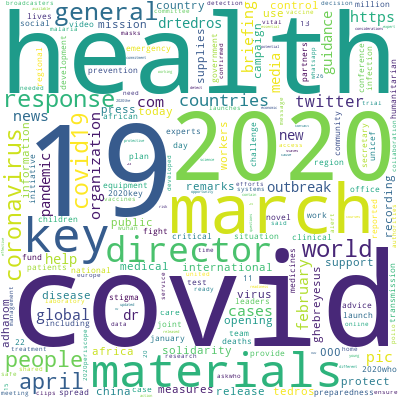

In [127]:
wc.to_image()